In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
'''import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Civic.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'
'''

"import zipfile\nwith zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Civic.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'\n"

In [ ]:
'''import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Civic.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'
'''

"import zipfile\nwith zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Civic.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'\n"

In [ ]:
'''import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Q3.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'
'''

"import zipfile\nwith zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Q3.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'\n"

In [ ]:
import os
import pandas as pd
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Montar o Google Drive (se necessário)
drive.mount('/content/drive')

# Caminhos base para as imagens
base_paths = [
    '/content/drive/MyDrive/pasta_principal/Polo',
    '/content/drive/MyDrive/pasta_principal/Q3',
    '/content/drive/MyDrive/pasta_principal/Civic'
]

# Listas de anos e cores
anos = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
cores = ['Black', 'Grey', 'White', 'Blue', 'Silver', 'Red']

# Inicializar listas para armazenar os dados
filenames = []
classes = []
modelos = []  # Nova lista para armazenar os modelos dos carros

# Iterar sobre os caminhos base, anos e cores para coletar os dados
for base_path in base_paths:
    modelo = os.path.basename(base_path)  # Obter o nome do modelo do caminho
    for ano in anos:
        for cor in cores:
            folder_path = os.path.join(base_path, str(ano), cor)
            if os.path.exists(folder_path):
                for filename in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, filename)
                    filenames.append(image_path)
                    classes.append(cor)
                    modelos.append(modelo)  # Adicionar o modelo à lista

# Criar o DataFrame
df = pd.DataFrame({'filename': filenames, 'class': classes, 'modelo': modelos})

# Criar geradores de dados de imagem para treinamento e validação
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Usar flow_from_dataframe com o DataFrame 'df'
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filename",
    y_col="class",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filename",
    y_col="class",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 17341 validated image filenames belonging to 6 classes.
Found 17341 validated image filenames belonging to 6 classes.


In [ ]:
# Criar o modelo de Deep Learning
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(cores), activation='softmax')  # Número de neurônios de saída = número de classes (cores)
])

# Compilar o modelo
model.compile(loss='categorical_crossentropy',  # Usar 'categorical_crossentropy' para múltiplas classes
              optimizer='adam',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Número de épocas de treinamento
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


541/541 ━━━━━━━━━━━━━━━━━━━━ 2073s 4s/step - accuracy: 0.5171 - loss: 1.1910 - val_accuracy: 0.7627 - val_loss: 0.6229
Epoch 2/10
  1/541 ━━━━━━━━━━━━━━━━━━━━ 17:48 2s/step - accuracy: 0.6250 - loss: 0.8822

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


541/541 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.6250 - loss: 0.8822 - val_accuracy: 0.7586 - val_loss: 0.5223
Epoch 3/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 1240s 2s/step - accuracy: 0.7687 - loss: 0.6173 - val_accuracy: 0.8266 - val_loss: 0.4707
Epoch 4/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 645us/step - accuracy: 0.7812 - loss: 0.6554 - val_accuracy: 0.7586 - val_loss: 0.4043
Epoch 5/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 1285s 2s/step - accuracy: 0.8114 - loss: 0.5102 - val_accuracy: 0.8314 - val_loss: 0.4597
Epoch 6/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.3002 - val_accuracy: 0.7586 - val_loss: 0.4198
Epoch 7/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 1264s 2s/step - accuracy: 0.8429 - loss: 0.4435 - val_accuracy: 0.8624 - val_loss: 0.3834
Epoch 8/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.8438 - loss: 0.3590 - val_accuracy: 0.8966 - val_loss: 0.3275
Epoch 9/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 1248s 2s/step - accuracy: 0.8549 - loss: 0.3952 - val_accuracy:

In [ ]:
# Avaliar o modelo
validation_steps = 541  # Número de passos de validação calculado
loss, accuracy = model.evaluate(validation_generator, steps=validation_steps)
print('Loss:', loss)
print('Accuracy:', accuracy)

541/541 ━━━━━━━━━━━━━━━━━━━━ 295s 545ms/step - accuracy: 0.8966 - loss: 0.2962
Loss: 0.3016470670700073
Accuracy: 0.8922712802886963


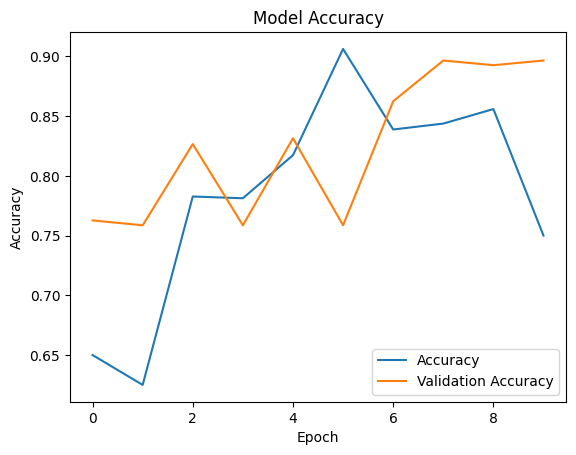

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.show()